# Polynomials and spline interpolation



As a first step, here some data for testing:

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange

np.random.seed(123456)

x = np.sort(np.random.uniform(0,10,10))
y = np.random.uniform(0,4,10)

## Polynomial regression (recap) and bias-varianes tradeoff

In [108]:
# set the degree of the polynomial
degree = 1

def polynomial_regression(x_points, y_points, degree):
    """
    Performs polynomial regression on the given set of points.

    :param x_points: List of x-coordinates of the points.
    :param y_points: List of y-coordinates of the points.
    :param degree: Degree of the polynomial to fit.
    :return: Coefficients of the fitted polynomial.
    """
    # Fit the polynomial of the given degree
    coeffs = np.polyfit(x_points, y_points, degree)

    # Create a function from the coefficients
    poly_func = np.poly1d(coeffs)

    return coeffs

coefficients = polynomial_regression(x, y, degree)

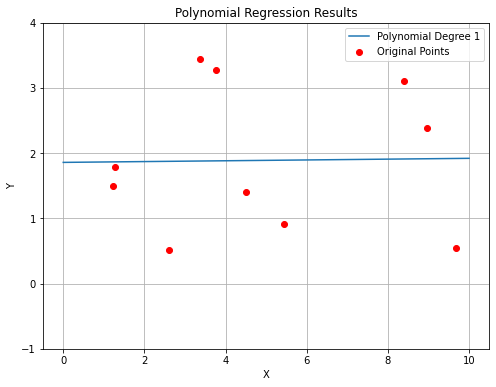

In [109]:
for i in range(1):

# Create a polynomial function from the coefficients
    poly_func = np.poly1d(coefficients)

    # Generate a dense range of x values for a smooth curve
    x_dense = np.linspace(0, 10, 500)

    # Create a figure with the aspect ratio of the image
    fig, ax = plt.subplots(figsize=(8, 6))

    # Set limits, labels, title, etc.
    # ax.set_xlim(0, 20)
    # ax.set_ylim(0, 10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Markers in virtual boreholes')

    plt.grid()

    # Example data plot
    plt.scatter(x, y, color='red', label='Original Points')

    # Plot the polynomial curve
    ax.plot(x_dense, poly_func(x_dense), label=f'Polynomial Degree {degree}')

    # Add labels, title, and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Polynomial Regression Results')
    ax.legend()

    ax.set_ylim([-1,4])

    # Show the plot
    plt.show()

### Effect of small perturbations

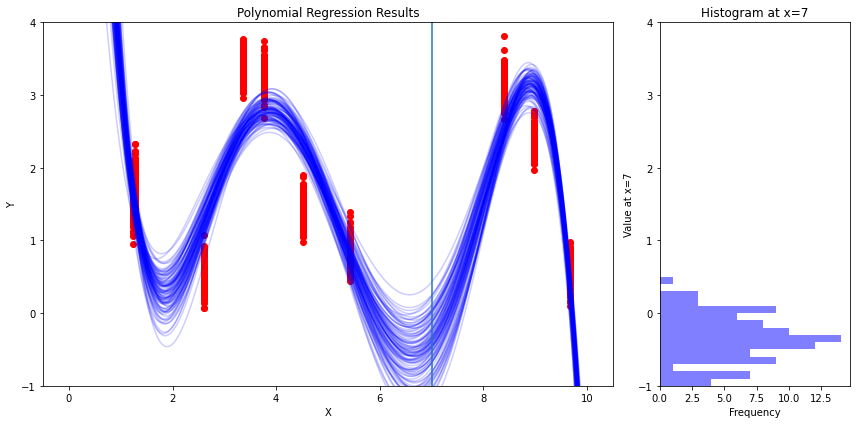

In [112]:
n = 100

degree = 5

# Generate a dense range of x values for a smooth curve
x_dense = np.linspace(0, 10, 500)

# Create a figure with the aspect ratio of the image
# Create a figure and a set of subplots
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

sample_values = []

for i in range(n):

    # perturb x
    y_pert = y + np.random.normal(0,.2,10)

    coefficients = polynomial_regression(x, y_pert, degree)

    # Create a polynomial function from the coefficients
    poly_func = np.poly1d(coefficients)
 
    plt.grid()

    # Example data plot
    ax.scatter(x, y_pert, color='red', label='Perturbed Points')

    # Plot the polynomial curve
    ax.plot(x_dense, poly_func(x_dense), label=f'Polynomial Degree {degree}', c='blue', alpha=0.2)

    # value at position x=7:
    sample_values.append(poly_func(7))

# Add labels, title, and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Polynomial Regression Results')
# ax.legend()

ax.axvline(7)

ax.set_ylim([-1,4])

# Add a vertical histogram to the second subplot (ax2)
ax2.hist(sample_values, orientation='horizontal', bins=np.arange(-1,4,0.1), color='blue', alpha=0.5)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Value at x=7')
ax2.set_title('Histogram at x=7')

ax2.set_ylim([-1,4])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

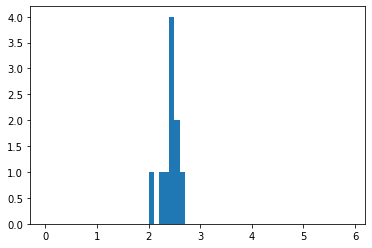

In [66]:
plt.hist(sample_values, bins=np.arange(0,6,0.1));

## Polynomial interpolation

In [37]:
def lagrange_interpolation(x_points, y_points):
    """
    Calculate and plot the Lagrange interpolating polynomial.

    :param x_points: List of x-coordinates of the points.
    :param y_points: List of y-coordinates of the points.
    """
    # Calculate the Lagrange interpolating polynomial
    polynomial = lagrange(x_points, y_points)

    # Generate a dense range of x values for plotting
    x_dense = np.linspace(1, 10, 500)

    # Evaluate the polynomial at the dense x values
    y_dense = polynomial(x_dense)

    return x_dense, y_dense

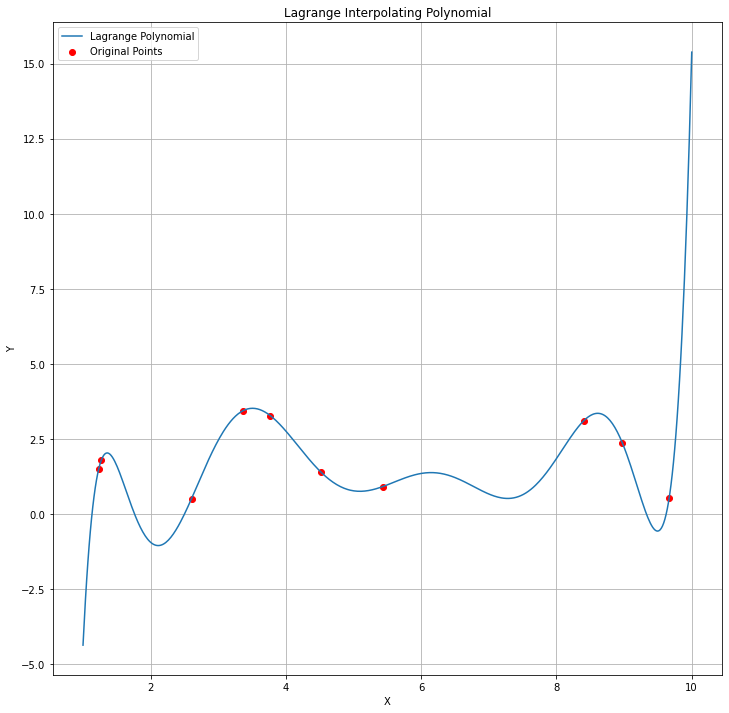

In [38]:
x_dense, y_dense = lagrange_interpolation(x, y)

fig, ax = plt.subplots(figsize=(12, 12))


plt.grid()

# Plot the original points
plt.scatter(x, y, color='red', label='Original Points')

# Plot the Lagrange interpolating polynomial
plt.plot(x_dense, y_dense, label='Lagrange Polynomial')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lagrange Interpolating Polynomial')
plt.legend()

# Show the plot
plt.show()

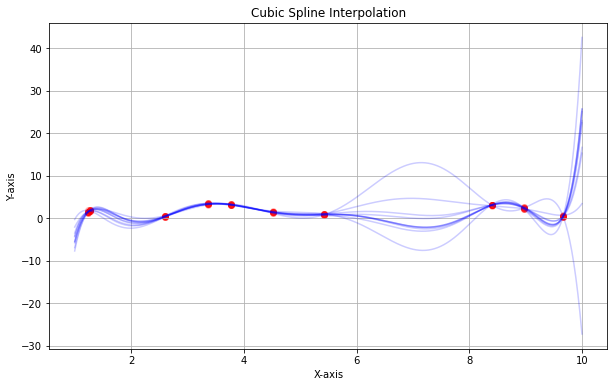

In [40]:
n = 10


# Plotting
plt.figure(figsize=(10, 6))

for i in range(n):

    # perturb x
    y_pert = y + np.random.normal(0,.11,10)

    x_dense, y_dense = lagrange_interpolation(x, y_pert)

    plt.plot(x_dense, y_dense, label='Lagrange interpolation', color='blue', alpha=0.2)

    plt.scatter(x, y_pert, color='red', label='Original Data Points', alpha=0.2)

plt.title('Cubic Spline Interpolation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.legend()
plt.grid(True)
plt.show()

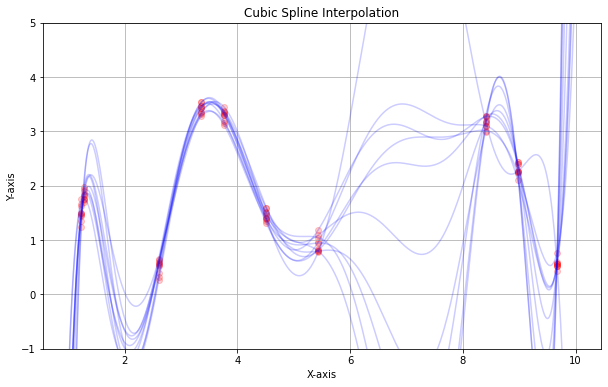

In [41]:
n = 10


# Plotting
plt.figure(figsize=(10, 6))

for i in range(n):

    # perturb x
    y_pert = y + np.random.normal(0,.11,10)

    x_dense, y_dense = lagrange_interpolation(x, y_pert)

    plt.plot(x_dense, y_dense, label='Lagrange interpolation', color='blue', alpha=0.2)

    plt.scatter(x, y_pert, color='red', label='Original Data Points', alpha=0.2)

plt.title('Cubic Spline Interpolation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.ylim([-1,5])

# plt.legend()
plt.grid(True)
plt.show()


## Polynomial Spline Interpolation

### Introduction

Polynomial spline interpolation is a method of fitting a smooth curve through a set of data points using piecewise polynomial functions. Unlike a single polynomial used in polynomial interpolation, spline interpolation uses multiple polynomials, each defined on a subinterval of the domain. This approach typically leads to better approximation properties and avoids issues like Runge's phenomenon, which can occur with high-degree polynomial interpolation.

### Cubic Splines

A commonly used type of spline is the **cubic spline**. Here are the key aspects of cubic spline interpolation:

#### Definition
A cubic spline is a piecewise polynomial function that is cubic in each interval and has continuous first and second derivatives.

#### Formulation
Given a set of data points $(x_0, y_0), (x_1, y_1), \ldots, (x_n, y_n)$, a cubic spline function $S(x)$ is constructed such that:

1. **Piecewise Cubic**: On each interval $[x_i, x_{i+1}]$, $S(x)$ is a cubic polynomial.
2. **Interpolating**: $S(x_i) = y_i$ for all $i = 0, 1, \ldots, n$.
3. **Continuity**: The first and second derivatives of $S(x)$ are continuous across the intervals.

#### Mathematical Representation
Each piece $S_i(x)$ of the spline over the interval $[x_i, x_{i+1}]$ can be represented as:

$$
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
$$

where $a_i, b_i, c_i,$ and $d_i$ are coefficients to be determined.

#### Boundary Conditions
To uniquely define a cubic spline, boundary conditions must be specified. Common choices include:
- **Natural Spline**: The second derivative at the endpoints is zero, i.e., $S''(x_0) = S''(x_n) = 0$.
- **Clamped Spline**: Specified first derivatives at the endpoints.

### Applications
Cubic spline interpolation is widely used in numerical analysis, computer graphics, and data fitting due to its smoothness and ability to approximate complex shapes more accurately than a single high-degree polynomial.


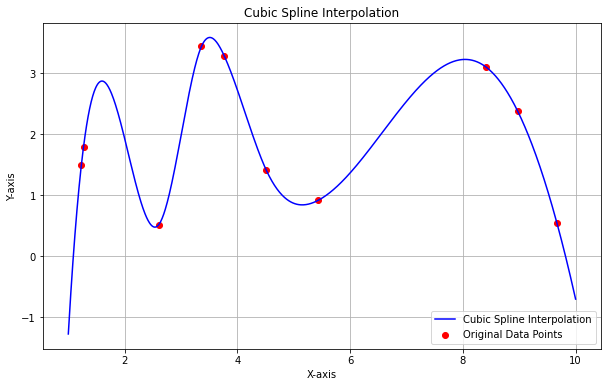

In [39]:
# Compute the cubic spline interpolation
cs = CubicSpline(x, y)

# Generate dense points for a smooth curve
x_dense = np.linspace(1, 10, 1000)

y_dense = cs(x_dense)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_dense, label='Cubic Spline Interpolation', color='blue')
plt.scatter(x, y, color='red', label='Original Data Points')
plt.title('Cubic Spline Interpolation')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


### Add random perturbations to points and repeat interpolations


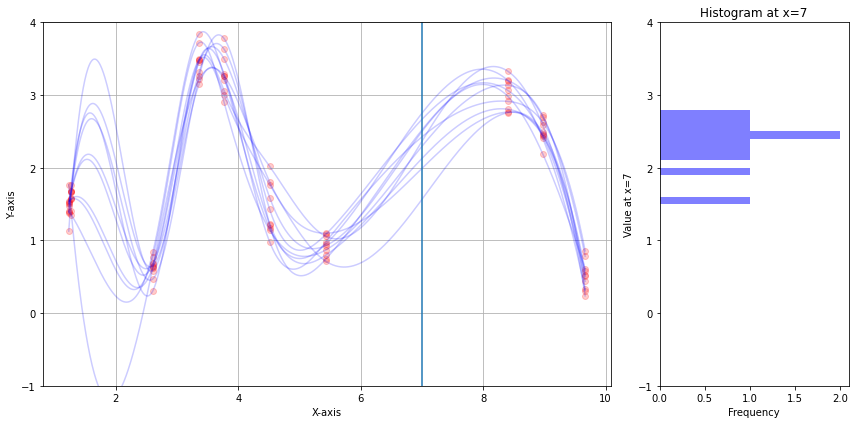

In [104]:
n = 10

# Plotting

# Create a figure and a set of subplots
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

sample_values = []


for i in range(n):

    # perturb x
    y_pert = y + np.random.normal(0,.2,10)

    # Compute the cubic spline interpolation
    cs = CubicSpline(x, y_pert)

    # Generate dense points for a smooth curve
    x_dense = np.linspace(min(x), max(x), 1000)
    y_dense = cs(x_dense)

    sample_values.append(cs(7).tolist())

    ax.plot(x_dense, y_dense, label='Cubic Spline Interpolation', color='blue', alpha=0.2)

    ax.scatter(x, y_pert, color='red', label='Original Data Points', alpha=0.2)

plt.title('Cubic Spline Interpolation')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# plt.legend()
ax.grid(True)

ax.axvline(7)

ax.set_ylim([-1,4])

# Add a vertical histogram to the second subplot (ax2)
ax2.hist(sample_values, orientation='horizontal', bins=np.arange(-1,4,0.1), color='blue', alpha=0.5)
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Value at x=7')
ax2.set_title('Histogram at x=7')

ax2.set_ylim([-1,4])

# Adjust the layout
plt.tight_layout()

